<a href="https://colab.research.google.com/github/yashanmick/data-storm-2.0/blob/master/XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [41]:
#import train dataset
train = pd.read_csv('/content/data_storm_20/Hotel-A-train.csv')
train.head()
train.shape

(27499, 24)

In [42]:
#import validate dataset 
validate = pd.read_csv('/content/data_storm_20/Hotel-A-validation.csv')
validate.head()
validate.shape

(2749, 24)

In [43]:
#import test dataset
test = pd.read_csv('/content/data_storm_20/Hotel-A-test.csv')
test.head()
test.shape

(4318, 23)

In [44]:
#backup original data
train_original = train.copy()
validate_original = validate.copy()
test_original = test.copy()

# **Understanding the data**

Following steps are done below.

1. Exploratory Data Analysis (EDA)
2. Missing value treatment
3. Null values treatment
4. Outlier treatment

In [45]:
train.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [46]:
validate.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [47]:
test.columns

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate'],
      dtype='object')

In [48]:
#object - categorical
train.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [49]:
train.shape

(27499, 24)

In [50]:
validate.shape

(2749, 24)

In [51]:
test.shape

(4318, 23)

In [52]:
# normilize train data
train['Reservation_Status'].value_counts(normalize=True)

Check-In    0.772392
Canceled    0.150333
No-Show     0.077276
Name: Reservation_Status, dtype: float64

In [53]:
# normalize validation data
validate['Reservation_Status'].value_counts(normalize=True)

Check-In    0.585668
Canceled    0.269553
No-Show     0.144780
Name: Reservation_Status, dtype: float64

In [54]:
train['Reservation_Status'].value_counts()

Check-In    21240
Canceled     4134
No-Show      2125
Name: Reservation_Status, dtype: int64

In [55]:
validate['Reservation_Status'].value_counts()

Check-In    1610
Canceled     741
No-Show      398
Name: Reservation_Status, dtype: int64

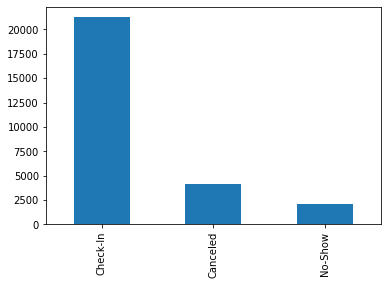

In [56]:
train['Reservation_Status'].value_counts().plot.bar()

# **Feature Engineering**

In [57]:
# check all coulmns
column_description = pd.read_csv('/content/data_storm_20/Hotel-A-data-dictionary.csv')
column_description

,Data Field,Description
0,Reservation-id,A unique booking id
1,Gender,Gender of the reservation person
2,Age,Age of the reservation person. Age is varying ...
3,Ethnicity,Ethnicity of the reservation person. This fiel...
4,Educational_Level,Educational level of the reservation person. T...
5,Income,Income of the reservation person. This field t...
6,Country_region,Country region of the reservation person. This...
7,Hotel_Type,Hotel type of the reservation; i.e City Hotels...
8,Expected_checkin,Expected check-in date
9,Expected_checkout,Expected checkout date


In [58]:
train['Reservation_Status'].replace('Check-In', 1,inplace=True)
train['Reservation_Status'].replace('Canceled', 2,inplace=True)
train['Reservation_Status'].replace('No-Show', 3,inplace=True)

validate['Reservation_Status'].replace('Check-In', 1,inplace=True)
validate['Reservation_Status'].replace('Canceled', 2,inplace=True)
validate['Reservation_Status'].replace('No-Show', 3,inplace=True)


In [59]:
train['Income'].replace('<25K', 1,inplace=True)
train['Income'].replace('25K --50K', 2,inplace=True)
train['Income'].replace('50K -- 100K', 3,inplace=True)
train['Income'].replace('>100K', 4,inplace=True)

validate['Income'].replace('<25K', 1,inplace=True)
validate['Income'].replace('25K --50K', 2,inplace=True)
validate['Income'].replace('50K -- 100K', 3,inplace=True)
validate['Income'].replace('>100K', 4,inplace=True)

In [60]:
test['Income'].replace('<25K', 1,inplace=True)
test['Income'].replace('25K --50K', 2,inplace=True)
test['Income'].replace('50K -- 100K', 3,inplace=True)
test['Income'].replace('>100K', 4,inplace=True)

In [61]:
train['Meal_Type'].replace('BB', 1,inplace=True)
train['Meal_Type'].replace('HB', 2,inplace=True)
train['Meal_Type'].replace('FB', 3,inplace=True)

validate['Meal_Type'].replace('BB', 1,inplace=True)
validate['Meal_Type'].replace('HB', 2,inplace=True)
validate['Meal_Type'].replace('FB', 3,inplace=True)

In [62]:
test['Meal_Type'].replace('BB', 1,inplace=True)
test['Meal_Type'].replace('HB', 2,inplace=True)
test['Meal_Type'].replace('FB', 3,inplace=True)

In [63]:
train['Dependants']=train['Adults']+train['Children']+train['Babies']
validate['Dependants'] = validate['Adults']+validate['Children']+validate['Babies']

In [64]:
test['Dependants']=test['Adults']+test['Children']+test['Babies']

In [65]:
train['Dependants_without_babies']=train['Adults']+train['Children']
validate['Dependants_without_babies'] = validate['Adults']+validate['Children']

In [66]:
test['Dependants_without_babies']=test['Adults']+test['Children']

In [67]:
train['checkin_month'] = pd.DatetimeIndex(train['Expected_checkin']).month
validate['checkin_month'] = pd.DatetimeIndex(validate['Expected_checkin']).month

In [68]:
test['checkin_month'] = pd.DatetimeIndex(test['Expected_checkin']).month

In [69]:
train['checkout_month']=pd.DatetimeIndex(train['Expected_checkout']).month
validate['checkout_month']=pd.DatetimeIndex(validate['Expected_checkout']).month

In [70]:
test['checkout_month']=pd.DatetimeIndex(test['Expected_checkout']).month

In [71]:
train['booking_month']=pd.DatetimeIndex(train['Booking_date']).month
validate['booking_month']=pd.DatetimeIndex(validate['Booking_date']).month

In [72]:
test['booking_month']=pd.DatetimeIndex(test['Booking_date']).month

In [74]:
train['booking_year']=pd.DatetimeIndex(train['Booking_date']).year
validate['booking_year']=pd.DatetimeIndex(validate['Booking_date']).year

train['checkout_year']=pd.DatetimeIndex(train['Expected_checkout']).year
validate['checkout_year']=pd.DatetimeIndex(validate['Expected_checkout']).year

train['checkin_year'] = pd.DatetimeIndex(train['Expected_checkin']).year
validate['checkin_year'] = pd.DatetimeIndex(validate['Expected_checkin']).year

In [75]:
test['booking_year']=pd.DatetimeIndex(test['Booking_date']).year

test['checkout_year']=pd.DatetimeIndex(test['Expected_checkout']).year

test['checkin_year'] = pd.DatetimeIndex(test['Expected_checkin']).year

In [76]:
train['Expected_checkin'] = pd.to_datetime(train['Expected_checkin'])
validate['Expected_checkin'] = pd.to_datetime(validate['Expected_checkin'])

train['Expected_checkout'] = pd.to_datetime(train['Expected_checkout'])
validate['Expected_checkout'] = pd.to_datetime(validate['Expected_checkout'])

train['Booking_date'] = pd.to_datetime(train['Booking_date'])
validate['Booking_date'] = pd.to_datetime(validate['Booking_date'])

In [77]:
test['Expected_checkin'] = pd.to_datetime(train['Expected_checkin'])

In [78]:
test['Expected_checkout'] = pd.to_datetime(train['Expected_checkout'])

In [79]:
test['Booking_date'] = pd.to_datetime(train['Booking_date'])

In [80]:
print(train['Booking_date'])

0       2015-05-21
1       2015-05-26
2       2015-06-29
3       2015-06-20
4       2015-06-20
           ...    
27494   2016-07-25
27495   2016-04-26
27496   2016-08-23
27497   2016-05-25
27498   2016-06-27
Name: Booking_date, Length: 27499, dtype: datetime64[ns]


In [81]:
train['days_until_check_in']=(train['Expected_checkin']-train['Booking_date']).dt.days
validate['days_until_check_in']=(validate['Expected_checkin']-validate['Booking_date']).dt.days

In [82]:
test['days_until_check_in']=(test['Expected_checkin']-test['Booking_date']).dt.days

In [83]:
train['staying_days'] = (train['Expected_checkout']-train['Expected_checkin']).dt.days
validate['staying_days'] = (validate['Expected_checkout']-validate['Expected_checkin']).dt.days

In [84]:
test['staying_days'] = (test['Expected_checkout']-test['Expected_checkin']).dt.days

#Feature Scaling

In [85]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
train[["days_until_check_in"]] = min_max_scaler.fit_transform(train[["days_until_check_in"]])
train[["staying_days"]] = min_max_scaler.fit_transform(train[["staying_days"]])

validate[["days_until_check_in"]] = min_max_scaler.fit_transform(validate[["days_until_check_in"]])
validate[["staying_days"]] = min_max_scaler.fit_transform(validate[["staying_days"]])
print(train["days_until_check_in"])

0        0.063202
1        0.056180
2        0.009831
3        0.022472
4        0.023876
           ...   
27494    0.057584
27495    0.183989
27496    0.018258
27497    0.143258
27498    0.096910
Name: days_until_check_in, Length: 27499, dtype: float64


In [86]:
train_original=train.copy()
validate_original=validate.copy()

In [87]:
train.drop(['Reservation-id', 'Expected_checkin', 'Expected_checkout','Booking_date','Adults','Children','Babies'], axis='columns', inplace=True)
validate.drop(['Reservation-id', 'Expected_checkin', 'Expected_checkout','Booking_date','Adults','Children','Babies'], axis='columns', inplace=True)

In [ ]:
#train.drop(['Expected_checkin', 'Expected_checkout','Booking_date'], axis='columns', inplace=True)
#validate.drop(['Expected_checkin', 'Expected_checkout','Booking_date'], axis='columns', inplace=True)

In [ ]:
train.columns

In [ ]:
# train_df = pd.DataFrame(train,columns=['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
#        'Income', 'Country_region', 'Hotel_Type', 'Meal_Type',
#        'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
#        'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
#        'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Dependants',
#        'Dependants_without_babies', 'checkin_month', 'checkout_month',
#        'booking_month', 'booking_year', 'checkout_year', 'checkin_year',
#        'days_until_check_in', 'staying_days'])

# count_nan_in_train_df = train_df.isnull().sum()
# print (count_nan_in_train_df)

In [ ]:
# validate_df = pd.DataFrame(validate,columns=['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
#        'Income', 'Country_region', 'Hotel_Type', 'Meal_Type',
#        'Visted_Previously', 'Previous_Cancellations', 'Deposit_type',
#        'Booking_channel', 'Required_Car_Parking', 'Reservation_Status',
#        'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Dependants',
#        'Dependants_without_babies', 'checkin_month', 'checkout_month',
#        'booking_month', 'booking_year', 'checkout_year', 'checkin_year',
#        'days_until_check_in', 'staying_days'])

# count_nan_in_validate_df = validate_df.isnull().sum()
# print (count_nan_in_validate_df)

In [ ]:
# train_df = train_df.dropna()


In [ ]:
# count_nan_in_train_df = train_df.isnull().sum()
# print (count_nan_in_train_df)

In [ ]:
train.shape

# Building the Model

In [88]:
#training data which are used for model training
x_t = train.drop(['Reservation_Status', 'Dependants_without_babies'], 1)
y_t = train.Reservation_Status

In [89]:
#validation data which are used to validate the model
x_v = validate.drop(['Reservation_Status', 'Dependants_without_babies'], 1)
y_v = validate.Reservation_Status

In [90]:
test = test.drop(['Dependants_without_babies'], 1)

In [91]:
x_t.head()
x_t.shape


(27499, 25)

In [92]:
x_v.head()
x_v.shape


(2749, 25)

In [93]:
x_t.shape

(27499, 25)

In [94]:
y_t.head()

0    1
1    1
2    1
3    1
4    1
Name: Reservation_Status, dtype: int64

In [95]:
y_t.shape

(27499,)

# One Hot encoding 
converting categorical values to ordinal values

In [97]:
x_t = pd.get_dummies(x_t)
x_t.head()

,Age,Income,Meal_Type,Discount_Rate,Room_Rate,Dependants,checkin_month,checkout_month,booking_month,booking_year,checkout_year,checkin_year,days_until_check_in,staying_days,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,40,1,1,10,218,4,7,7,5,2015,2015,2015,0.063202,0.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1
1,49,3,1,0,185,6,7,7,5,2015,2015,2015,0.056180,0.0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0
2,42,1,1,0,119,6,7,7,6,2015,2015,2015,0.009831,1.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0
3,25,4,1,5,144,7,7,7,6,2015,2015,2015,0.022472,0.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1
4,62,2,1,10,242,2,7,7,6,2015,2015,2015,0.023876,0.0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1


In [98]:
x_v = pd.get_dummies(x_v)
x_v.head()

,Age,Income,Meal_Type,Discount_Rate,Room_Rate,Dependants,checkin_month,checkout_month,booking_month,booking_year,checkout_year,checkin_year,days_until_check_in,staying_days,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Country_region_East,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_Airport Hotels,Hotel_Type_City Hotel,Hotel_Type_Resort,Visted_Previously_No,Visted_Previously_Yes,Previous_Cancellations_No,Previous_Cancellations_Yes,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,56,1,2,15,192,4,8,9,2,2016,2016,2016,0.880531,0.333333,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1
1,60,2,3,0,187,4,8,9,3,2016,2016,2016,0.792035,1.000000,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0
2,58,1,3,10,227,4,9,9,2,2016,2016,2016,0.871681,0.000000,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
3,23,2,3,25,189,3,8,9,5,2016,2016,2016,0.473451,0.333333,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1
4,47,2,2,10,218,2,8,9,5,2016,2016,2016,0.424779,0.000000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1


Checking for null values

In [99]:
x_t.isnull().values.any()

False

In [100]:
x_t.isnull().sum().sum()

0

In [101]:
y_t.isnull().values.any()

False

In [102]:
y_t.isnull().sum().sum()

0

In [103]:
x_t.shape


(27499, 45)

In [104]:
x_t.columns

Index(['Age', 'Income', 'Meal_Type', 'Discount_Rate', 'Room_Rate',
       'Dependants', 'checkin_month', 'checkout_month', 'booking_month',
       'booking_year', 'checkout_year', 'checkin_year', 'days_until_check_in',
       'staying_days', 'Gender_F', 'Gender_M', 'Ethnicity_African American',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Educational_Level_College', 'Educational_Level_Grad',
       'Educational_Level_High-School', 'Educational_Level_Mid-School',
       'Country_region_East', 'Country_region_North', 'Country_region_South',
       'Country_region_West', 'Hotel_Type_Airport Hotels',
       'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Visted_Previously_No',
       'Visted_Previously_Yes', 'Previous_Cancellations_No',
       'Previous_Cancellations_Yes', 'Deposit_type_No Deposit',
       'Deposit_type_Non-Refundable', 'Deposit_type_Refundable',
       'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online

In [105]:
y_t.shape

(27499,)

In [106]:
validate.shape

(2749, 27)

In [ ]:
#from sklearn.model_selection import StratifiedKFold

# Model training and validation

XGBOOST

In [107]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=150, max_depth=10) 
model.fit(x_t, y_t) 
pred_validate = model.predict(x_v) 

In [108]:
print(pred_validate)
print(set(list(pred_validate)))
accuracy_score(y_v,pred_validate)

[1 1 1 ... 1 1 1]
{1, 2, 3}


0.5831211349581666

# Testing the model with test data

In [109]:
test['Income'].replace('<25K', 1,inplace=True)
test['Income'].replace('25K --50K', 2,inplace=True)
test['Income'].replace('50K -- 100K', 3,inplace=True)
test['Income'].replace('>100K', 4,inplace=True)

test['Meal_Type'].replace('BB', 1,inplace=True)
test['Meal_Type'].replace('HB', 2,inplace=True)
test['Meal_Type'].replace('FB', 3,inplace=True)

test['Dependants']=test['Adults']+test['Children']+test['Babies']

test['checkin_month'] = pd.DatetimeIndex(test['Expected_checkin']).month

test['checkout_month']=pd.DatetimeIndex(test['Expected_checkout']).month

test['booking_month']=pd.DatetimeIndex(test['Booking_date']).month

test['Expected_checkin'] = pd.to_datetime(test['Expected_checkin'])

test['Expected_checkout'] = pd.to_datetime(test['Expected_checkout'])

test['Booking_date'] = pd.to_datetime(test['Booking_date'])

test['days_until_check_in']=(test['Expected_checkin']-test['Booking_date']).dt.days

test['staying_days'] = (test['Expected_checkout']-test['Expected_checkin']).dt.days

In [110]:
min_max_scaler = MinMaxScaler()
test[["days_until_check_in"]] = min_max_scaler.fit_transform(test[["days_until_check_in"]])
test[["staying_days"]] = min_max_scaler.fit_transform(test[["staying_days"]])

In [111]:
test.drop(['Reservation-id', 'Expected_checkin', 'Expected_checkout','Booking_date','Adults','Children','Babies'], axis='columns', inplace=True)

In [112]:
test = pd.get_dummies(test)
test.columns
test.shape

(4318, 45)

In [113]:
x_t.columns

Index(['Age', 'Income', 'Meal_Type', 'Discount_Rate', 'Room_Rate',
       'Dependants', 'checkin_month', 'checkout_month', 'booking_month',
       'booking_year', 'checkout_year', 'checkin_year', 'days_until_check_in',
       'staying_days', 'Gender_F', 'Gender_M', 'Ethnicity_African American',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Educational_Level_College', 'Educational_Level_Grad',
       'Educational_Level_High-School', 'Educational_Level_Mid-School',
       'Country_region_East', 'Country_region_North', 'Country_region_South',
       'Country_region_West', 'Hotel_Type_Airport Hotels',
       'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Visted_Previously_No',
       'Visted_Previously_Yes', 'Previous_Cancellations_No',
       'Previous_Cancellations_Yes', 'Deposit_type_No Deposit',
       'Deposit_type_Non-Refundable', 'Deposit_type_Refundable',
       'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online

In [114]:
test.columns

Index(['Age', 'Income', 'Meal_Type', 'Discount_Rate', 'Room_Rate',
       'Dependants', 'checkin_month', 'checkout_month', 'booking_month',
       'booking_year', 'checkout_year', 'checkin_year', 'days_until_check_in',
       'staying_days', 'Gender_F', 'Gender_M', 'Ethnicity_African American',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Educational_Level_College', 'Educational_Level_Grad',
       'Educational_Level_High-School', 'Educational_Level_Mid-School',
       'Country_region_East', 'Country_region_North', 'Country_region_South',
       'Country_region_West', 'Hotel_Type_Airport Hotels',
       'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Visted_Previously_No',
       'Visted_Previously_Yes', 'Previous_Cancellations_No',
       'Previous_Cancellations_Yes', 'Deposit_type_No Deposit',
       'Deposit_type_Non-Refundable', 'Deposit_type_Refundable',
       'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online

In [115]:
# prediction result
pred_test = model.predict(test)

# Export result 

In [116]:
# result dataframe
submission=pd.DataFrame()
submission['Reservation-id']=test_original['Reservation-id']
submission['Reservation_Status']=pred_test

In [117]:
# checking result datafreme
submission['Reservation_Status'].unique()

array([1, 2, 3])

In [118]:
# export to csv
submission.to_csv('Submission_6.csv',index=False)